In [10]:
import pytesseract
import pandas as pd
from PIL import Image
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

## File Path

In [4]:
IMAGE_PATH = "../datafiles/Page1.jpg"
imageMAT = Image.open(IMAGE_PATH)
matcopy = imageMAT.copy()
imageNUMPY = np.array(matcopy, dtype='uint8')

In [5]:
len(imageNUMPY)

4160

7283

In [30]:
print(type(imageMAT))
print(type(matcopy))
print(type(imageNUMPY))
print(imageNUMPY.dtype)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
uint8


### Noise Removal 

In [35]:
def image_smoothening(img):
    ret1, th1 = cv.threshold(img, 160, 255, cv.THRESH_BINARY)
    ret2, th2 = cv.threshold(th1, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    blur = cv.GaussianBlur(th2, (5, 5), 0)
    ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    return th3

In [58]:
def remove_noise_and_smooth(file):
    img = cv.cvtColor(file, cv.COLOR_RGB2GRAY)
    plt.imshow(img)
    filtered = cv.adaptiveThreshold(img.astype(np.uint8), 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 9, 41)
    kernel = np.ones((1, 1), np.uint8)
    opening = cv.morphologyEx(filtered, cv.MORPH_OPEN, kernel)
    closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)
    img = image_smoothening(img)
    or_image = cv.bitwise_or(img, closing)
    return or_image

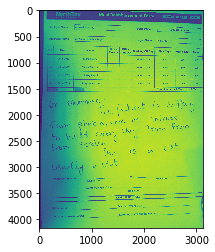

In [59]:
nImage = remove_noise_and_smooth(imageNUMPY)

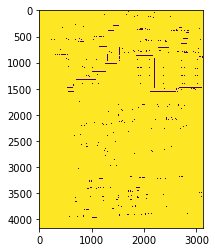

In [60]:
plt.imshow(nImage)

## Get blocks

In [6]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [8]:
def get_noise_val(imagePIL, BinaryThreshold, NoiseThreshold):
    matcopy = imagePIL.copy()
    imageNUMPY = np.array(matcopy, dtype='uint8')
    data_result = pytesseract.image_to_data(imagePIL, lang='eng')
    data_lines = ([s_inner.split() for s_inner in data_result.splitlines()])
    df = pd.DataFrame(data_lines[1:], columns = data_lines[0])
    df = df.dropna()
    
    for index, row in df.iterrows():
        r = int(row['top']); r_ = r + int(row['height'])
        c = int(row['left']); c_ = c + int(row['width'])
        imageNUMPY[r:r_, c:c_, :] = 255
    
    bin_ = rgb2gray(imageNUMPY)
    
    for r in range(0, bin_.shape[0]):
        for c in range(0, bin_.shape[1]):
            if(bin_[r, c] < noiseThreshold):
                bin_[r, c ] = 0
            else:
                bin_[r, c ] = 1
    
    ratio = bin_.sum()/sum(bin_.shape)
    return ratio, ratio > NoiseThreshold, bin_ #returns the ratio, result, binary_Image

In [11]:
Tessstart = time.time()
data_result = pytesseract.image_to_boxes(imageMAT, lang='eng')
print("Tess", time.time() - Tessstart)

Tess 3.5533552169799805


In [7]:
data_result

'~ 0 3949 116 4160 0\n~ 0 3459 88 3696 0\n~ 0 3696 88 3735 0\n~ 0 3735 116 3949 0\n~ 0 3211 279 3459 0\n~ 0 3060 647 3211 0\n~ 0 2908 651 3060 0\n~ 0 2711 817 2751 0\n~ 0 282 863 2711 0\n~ 0 2751 655 2908 0\n~ 0 162 564 282 0\n~ 0 0 519 162 0\n~ 132 3886 186 3949 0\n~ 132 3949 3120 4160 0\n~ 1637 3886 3120 3949 0\nE 186 3804 225 3856 0\nm 186 3814 254 3855 0\np 255 3804 285 3846 0\nl 286 3816 297 3856 0\no 298 3814 326 3845 0\ny 328 3805 381 3844 0\ne 346 3804 395 3856 0\ne 382 3815 406 3844 0\nN 420 3815 451 3853 0\na 455 3815 477 3843 0\nm 481 3815 521 3842 0\ne 524 3814 549 3842 0\n: 553 3815 560 3840 0\n= 601 3795 663 3868 0\n| 688 3809 700 3850 0\nA 688 3812 718 3848 0\nh 721 3811 746 3850 0\nm 752 3811 791 3838 0\ne 759 3809 809 3850 0\nd 795 3809 848 3848 0\nS 864 3809 886 3846 0\nh 892 3808 916 3847 0\na 893 3805 943 3847 0\nh 920 3808 941 3835 0\nz 947 3808 971 3845 0\na 974 3807 997 3834 0\nd 999 3805 1050 3843 0\nD 1850 3769 1891 3849 0\ne 1868 3785 1898 3821 0\ns 1901 3783 

In [34]:
data_result = pytesseract.image_to_data(imageMAT, lang='eng')
data_lines = ([s_inner.split() for s_inner in data_result.splitlines()])

In [35]:
df = pd.DataFrame(data_lines[1:], columns = data_lines[0])
newDf = df.dropna()

In [33]:
newDf.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
21,5,1,2,1,1,1,186,304,220,52,96,Employee
22,5,1,2,1,1,2,420,307,140,39,96,Name:
23,5,1,2,1,1,3,688,310,160,41,96,Ahmed
24,5,1,2,1,1,4,864,314,186,41,96,Shahzad
25,5,1,2,1,1,5,1868,334,264,63,96,Designation:


In [36]:
newDf.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
22,5,1,3,1,1,1,186,304,220,52,81,Employee
23,5,1,3,1,1,2,420,307,140,39,81,Name:
24,5,1,3,1,1,3,601,292,62,73,33,=
25,5,1,3,1,1,4,688,310,160,41,68,|Ahmed
26,5,1,3,1,1,5,864,313,186,42,96,Shahzad


In [21]:
newDf.to_csv('first.csv')

## Ignore detected components

In [64]:
for index, row in newDf.iterrows():
    r = int(row['top']); r_ = r + int(row['height'])
    c = int(row['left']); c_ = c + int(row['width'])
    imageNUMPY[r:r_, c:c_, :] = 255

#### Now imageNumpy has image with noise only

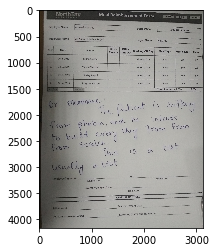

In [93]:
plt.imshow(imageMAT)

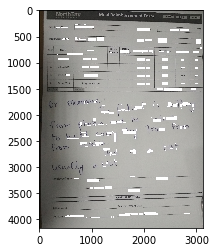

In [65]:
plt.imshow(imageNUMPY)

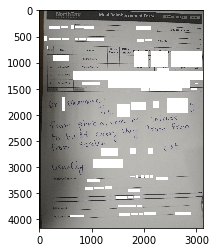

In [100]:
plt.imshow(imageNUMPY)

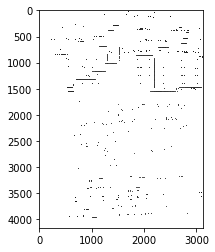

In [82]:
plt.imshow(nImage, 'gray')

In [83]:
plt.imsave("p2.png", nImage)